# PCA from Scratch

Code is adapted from https://www.askpython.com/python/examples/principal-component-analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## Individual PCA Steps

### 1. Make Random Dataset

Prepare dataset and subtract mean from each data point so dataset is centred on origin (helpful when calculating covariance matrix). X has 20 rows and 5 columns, meaning 20 observations and 5 variables for each observation. 

In [96]:
np.random.seed(0)
X = np.random.randint(10,50,100).reshape(20,5)
X_meaned = X - np.mean(X, axis=0)

### 2. Find Covariance Matrix S

Find the covariance matrix $\textbf{S}$. rowvar is set to False so that covariance matrix will be in the required dimensions.

NB: If rowvar is True (default), then each row represents a variable, with observations in the columns. Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.

Equivalent to Eq. (12.3) in Bishop's book:

$$
\textbf{S} = \frac{1}{N-1} \sum^{N}_{n=1}(\textbf{x}_n - \bar{\textbf{x}})(\textbf{x}_n - \bar{\textbf{x}})^T
$$

In [177]:
S = np.cov(X_meaned, rowvar = False)
print(S)

# Alternative method by hand
# S = np.dot(X_meaned.T, X_meaned)/19
# print(S)

[[179.8         -8.59473684  50.54736842  -6.2         64.66842105]
 [ -8.59473684 165.83947368 -30.66315789 -12.41052632  22.41842105]
 [ 50.54736842 -30.66315789 169.93684211 -10.66315789 -27.92631579]
 [ -6.2        -12.41052632 -10.66315789 164.48421053  -5.35789474]
 [ 64.66842105  22.41842105 -27.92631579  -5.35789474 142.57631579]]


### 3. Find Eigenvalues and Eigenvectors

Find the eigenvalues ($\lambda_i$) and eigenvectors ($\textbf{u}_i$) of $\textbf{S}$. Reverse the order so that they are both in descending order.

In [181]:
evals, evecs = np.linalg.eigh(S)
evals = np.flip(evals)
evecs = np.flip(evecs, axis = 1)

[ 65.66356266 131.37884454 168.61711262 214.14741483 242.82990745]
[[-0.77315999  0.19906038 -0.14948123  0.02658499  0.58270678]
 [ 0.16985938  0.59043927  0.26473045  0.74101872  0.05777807]
 [-0.50015656 -0.51537598  0.23161017  0.47763605 -0.44994616]
 [ 0.12478878 -0.12379376 -0.90074708  0.39504172 -0.04122629]
 [-0.32808931  0.57516879 -0.20636032 -0.25688584 -0.67302552]]


### 4. Select the Number of Principal Components

Start by plotting the cumulative percentage of total variance described by each principal component.

In [182]:
var = evals/np.sum(evals)
cum_var = np.cumsum(var)


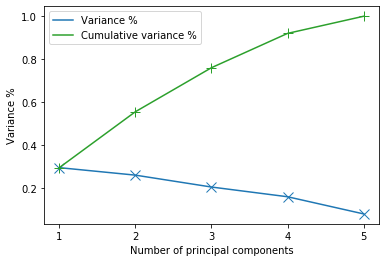

In [183]:
plt.figure()
plt.plot(np.array(range(1,len(evals)+1)), var, label = 'Variance %', color = 'tab:blue')
plt.plot(np.array(range(1,len(evals)+1)), var, 'x', color = 'tab:blue', markersize = 10)
plt.plot(np.array(range(1,len(evals)+1)), cum_var, label = 'Cumulative variance %', color = 'tab:green')
plt.plot(np.array(range(1,len(evals)+1)), cum_var, '+', color = 'tab:green', markersize = 10)
plt.xlabel('Number of principal components')
plt.ylabel('Variance %')
plt.xticks(np.array(range(1,len(evals)+1)))
plt.legend()
plt.show()

Visually the biggest decrease in added variance % is between 4 and 5 principal components, so we select 4 principal components. We can also compute this mathematically:

In [184]:
var_diff = [var[i] - var[i+1] for i in range(len(var)-1)]
n_components = var_diff.index(max(var_diff))+1
print('Optimal number of principal components:', n_components)

Optimal number of principal components: 4


### 5. Transform Data

In [82]:
evecs_subset = evecs[:,0:n_components]
X_reduced = np.dot(evecs_subset.T, X_meaned.T).T

<code style="background:yellow;color:black"> What is the mathematical equation for this? </code>

## Making PCA Function and Testing

### Making PCA Function

In [185]:
def PCA_fs(X,n_components=None):
    ''' PCA function adapted from https://www.askpython.com/python/examples/principal-component-analysis
    Input:
    X: numpy nd.array
    n_components: Denotes the number of principal components; can be integer or None with default as n_components = None.
                  If None, function will automatically the optimal number of principal components based by finding the maximum
                  decrease in added variance %
    Returns:
    X_reduced: The dataset with redu

    '''
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    S = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    evals , evecs = np.linalg.eigh(S)
    evals = np.flip(evals)
    evecs = np.flip(evecs, axis = 1)
     
    #Step-4
    var = evals/np.sum(evals)
    cum_var = np.cumsum(var)
    
    plt.figure()
    plt.plot(np.array(range(1,len(evals)+1)), var, label = 'Variance %', color = 'tab:blue')
    plt.plot(np.array(range(1,len(evals)+1)), var, 'x', color = 'tab:blue', markersize = 10)
    plt.plot(np.array(range(1,len(evals)+1)), cum_var, label = 'Cumulative variance %', color = 'tab:green')
    plt.plot(np.array(range(1,len(evals)+1)), cum_var, '+', color = 'tab:green', markersize = 10)
    plt.xlabel('Number of principal components')
    plt.ylabel('Variance %')
    plt.xticks(np.array(range(1,len(evals)+1)))
    plt.legend()
    plt.show()
    
    var_diff = [var[i] - var[i+1] for i in range(len(var)-1)]
    if n_components == None:
        n_components = var_diff.index(max(var_diff))+1
        print('Optimal number of principal components:', n_components)
    
    #Step-5
    evecs_subset = evecs[:,0:n_components]
    X_reduced = np.dot(evecs_subset.transpose(), X_meaned.transpose()).transpose()
     
    return X_reduced, evals, evecs

### Testing PCA Function

Retrieve dataset and split into data and target

In [110]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [204]:
data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [112]:
x = data.iloc[:,0:4]
target = data.iloc[:,4]

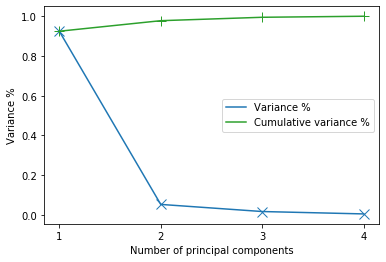

In [196]:
x_reduced, x_evals, x_evecs = PCA_fs(x, 2)

In [198]:
#Creating a Pandas DataFrame of reduced Dataset
reduced_df = pd.DataFrame(x_reduced, columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
reduced_df = pd.concat([reduced_df, pd.DataFrame(target)], axis = 1)

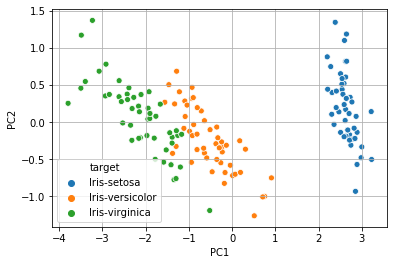

In [201]:
plt.figure()
sb.scatterplot(data = reduced_df, x = 'PC1',y = 'PC2' , hue = 'target')
plt.grid()
plt.show()